# Metadata

```yaml
Course:   DS 5100
Module:   05 Numpy HW
Topic:    Capital Asset Pricing Model (CAPM)
Author:   R.C. Alvarado (revised)
Date:     7 July 2023
```

# Student Info

* Name: Chris van Niekerk
* Net ID: mdp8gd
* URL of this file in GitHub:

# Instructions

In your **private course repo on Rivanna**, use this Jupyter notebook and the data file `capm_market_data.csv` to write code that performs the tasks below. The data file is in the HW directory of this module in the course repo.

Save your notebook in the `M05` directory.

Remember to add and commit these files to your repo. 

Then push your commits to your repo on GitHib.

Be sure to fill out the **Student Info** block above.

To submit your homework, save the notebook as a PDF and upload it to GradeScope, following the instructions.

**TOTAL POINTS: 10**

# Overview

<!-- In this exer Use NumPy and functions to 
* compute a stock's CAPM beta
* perform sensitivity analysis
* understand how the data points impact the beta estimate
 -->
 
In finance, a capital asset pricing model (CAPM) is a single-factor regression model used to explain and predict excess stock returns. 

There are better, more accurate models, but CAPM has its uses. 

For example, the **market beta** $\beta_i$ a useful output.

Here is the formula for calculating the expected excess return:

$E[R_i] - R_f  = \beta_i ( E[R_m] - R_f )$

where:

* $ER_i$: expected return of stock $i$
* $R_f$: risk-free rate
* $\beta_i$: market beta of the stock
* $ER_m - R_f$: market risk premium

**Review the instructions below to complete the requested tasks.**

**TOTAL POINTS: 10**

# Setting Up

Import [NumPy](https://numpy.org/doc/stable/)

In [1]:
import numpy as np

Define Risk-free Treasury rate. You will use this constant below.

In [2]:
R_f = 0.0175 / 252

# Prepare the Data

We import the data and convert it into usable Numby arrays.

**Read in the market data**

The values are closing prices, adjusted for splits and dividends.

The prefixes of the second two columns are based on the following codes:
* SPY is an ETF for the S&P 500 (i.e. the stock market as whole)
* AAPL stands for Apple  

In [3]:
data_file = "capm_market_data-2.csv"

In [4]:
data_2D = np.array([row.strip().split(',') for row in open(data_file, 'r').readlines()])

**Separete columns from the data** 

In [5]:
COLS = np.str_(data_2D[0])

In [6]:
COLS

np.str_("['date' 'spy_adj_close' 'aapl_adj_close']")

**Separate columns by data types**

Numpy wants everything to in a data structure to be of the same type.

In [7]:
DATES = data_2D[1:, 0]

In [8]:
RETURNS = data_2D[1:, 1:].astype('float')

# Task 1 

(1 PT) 

Print the first 5 rows of the `RETURNS` table.

In [9]:
print(RETURNS[:5])

[[321.5557861 298.8299561]
 [319.1209106 295.9247131]
 [320.3383789 298.2827148]
 [319.4376526 296.8798828]
 [321.1401062 301.6555481]]


# Task 2 

(1 PT) 

Print the first five values from the SPY column in `RETURNS`.

Then do the same for the AAPL column.

Use one cell for each operation.

In [10]:
print(RETURNS[:5, 0])

[321.5557861 319.1209106 320.3383789 319.4376526 321.1401062]


In [11]:
print(RETURNS[:5, 1])

[298.8299561 295.9247131 298.2827148 296.8798828 301.6555481]


# Task 3 

(1 PT)

Compute the excess returns by subtracting the constant `R_f` from `RETURNS`.

Save the result as numpy 2D array (i.e. a table) named `EXCESS`.

Print the LAST five rows from the new table.

In [12]:
EXCESS = RETURNS - R_f

print(EXCESS[-5:])

[[314.37993546 383.00994036]
 [317.58992686 383.67992326]
 [314.83992686 381.90993426]
 [318.91994396 388.22994156]
 [321.84993666 390.89992446]]


# Task 4 

(1 PT)

Make a simple [scatterplot using Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) with SPY excess returns on the x-axis, AAPL excess returns on the y-axis.

Hint: Use the following code:

```python
from matplotlib.pyplot import scatter

scatter(<x>, <y>)
```
Replace `<x>` and `<y>` with the appropriate vectors.

You may want to save the vectors for the SPY and AAPL columns as `x` and `y` respectively. This will make it visually easier to perform Task 6.

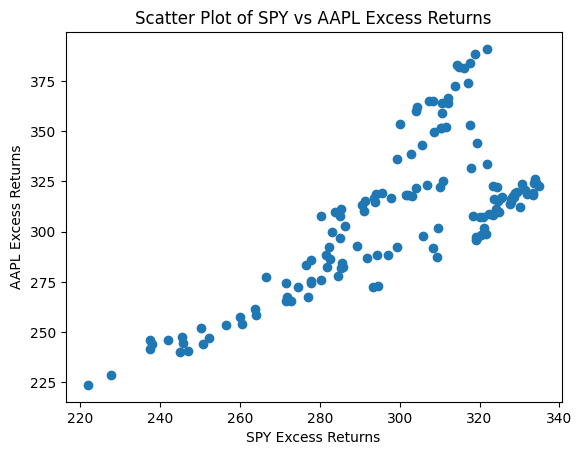

In [17]:
import matplotlib.pyplot as plt

# Extract the SPY and AAPL excess returns from the EXCESS array
# Assuming SPY is the first column and AAPL is the second column in EXCESS
x = EXCESS[:, 0]  # SPY excess returns
y = EXCESS[:, 1]  # AAPL excess returns

# Creating the scatter plot:
plt.scatter(x, y)
plt.xlabel('SPY Excess Returns')
plt.ylabel('AAPL Excess Returns')
plt.title('Scatter Plot of SPY vs AAPL Excess Returns')
plt.show()


# Taks 5 

(3 PTS)

Use the **normal equation**, listed below, to compute the Regression Coefficient Estimate of the data plotted above, $\hat\beta_i$.

Note that $x^T$ denotes the transpose of $x$.

$\begin{aligned} \hat\beta_i=(x^Tx)^{−1}x^Ty \end{aligned}$ 

Use the Numpy functions for matrix to do this &mdash; multiplication, transpose, and inverse. 

Note, however, that since $x$ in this case a single column matrix, i.e. a vector, the result of $x'x$ will be a scalar, which is not invertable. So you can just invert the result by division, i.e. 

$\hat\beta_i = \large\frac{1}{x^Tx} \small(x^Ty)$

Be sure to review what these operations do, and how they work, if you're a bit rusty.

**You should find that $\hat\beta_i > 1$.**

This means that the risk of AAPL stock, given the data, and according to this particular (flawed) model, is higher relative to the risk of the S&P 500.


In [18]:
x = EXCESS[:, 0]  # SPY excess returns
y = EXCESS[:, 1]  # AAPL excess returns

# Compute the transpose of x:
x_T = np.transpose(x)

# Compute x^T y:
x_T_y = np.dot(x_T, y)

# Compute x^T x:
x_T_x = np.dot(x_T, x)

# Compute the regression coefficient estimate:
beta_i = x_T_y / x_T_x

print('Regression Coefficient Estimate (β̂i):', beta_i)

Regression Coefficient Estimate (β̂i): 1.0299802942344773


# Task 6

(3 PTS)

**Measuring Beta Sensitivity to Dropping Observations (Jackknifing)**

Let's understand how sensitive the beta is to each data point.   
We want to drop each data point (one at a time), compute \\(\hat\beta_i\\) using our formula from above, and save each measurement.

Write a function called `beta_sensitivity()` with these specs:

- Take numpy arrays x and y as inputs.
- For each observation i, compute the beta without the current observation. You can use a `lambda` function for this.
- Return a list of tuples each containing the observation row dropped and the beta estimate, i.e. something like `(i, beta_est)`, depending how you've named your variables.

Hint: `np.delete(x, i)` will delete observation i from array x. 

Call `beta_sensitivity()` and print the first five tuples of output.

In [19]:
def beta_sensitivity(x, y):
    n = len(x)
    results = []
    
    for i in range(n):
        # Create new x and y arrays with the i-th observation removed:
        x_i = np.delete(x, i)
        y_i = np.delete(y, i)
        
        # Compute the regression coefficient estimate β̂_i:
        x_T = np.transpose(x_i)
        x_T_y = np.dot(x_T, y_i)
        x_T_x = np.dot(x_T, x_i)
        beta_est = x_T_y / x_T_x
        
        # Append the result as a tuple (i, beta_est):
        results.append((i, beta_est))
    
    return results

x = EXCESS[:, 0]  # SPY excess returns
y = EXCESS[:, 1]  # AAPL excess returns

# Call beta_sensitivity() and print the first five tuples of output:
beta_sensitivity_results = beta_sensitivity(x, y)
print(beta_sensitivity_results[:5])

[(0, np.float64(1.0308477301637948)), (1, np.float64(1.0308516176325033)), (2, np.float64(1.0308255236168484)), (3, np.float64(1.0308357542780597)), (4, np.float64(1.0307595018370457))]
